In [65]:
#Import Dependencies
import pandas as pd
import os
import csv
import requests
import matplotlib.pyplot as plt
from config import api_key 
import json
import pprint
import kdtree
import random
import scipy.stats as sts
from sklearn import datasets

In [66]:
#Create connection for Open Weather Map 
#Identify location and URL logic for open weather map
url="http://api.openweathermap.org/data/2.5/weather?q="

#Create Request URLs and Variables
#city_name=""
key="&appid="+ api_key

#Obtain cities from PIP install 
_current_dir, _current_filename = os.path.split("C:\\Users\\porti\\anaconda3\\lib\\site-packages\\citipy\\citipy.py'>")
_world_cities_csv_path = os.path.join(_current_dir, 'worldcities.csv')
_world_cities_kdtree = kdtree.create(dimensions=2)
WORLD_CITIES_DICT = {}


In [67]:
print(url)

http://api.openweathermap.org/data/2.5/weather?q=


In [68]:
#Access Random City Data
with open(_world_cities_csv_path, 'r') as csv_file:
    cities = csv.reader(csv_file)
    # discard the headers
    cities.__next__()
    city_list=[]
    random_cities=[]
    for city in cities:
        city_coordinate_key = (float(city[2]), float(city[3]))
        _world_cities_kdtree.add(city_coordinate_key)
        city_list.append(city[1])
random_cities.append(random.choices(city_list,k=51))
random_cities

[['lamut',
  'saint helens',
  'heliconia',
  'camargo',
  'zaragoza',
  'teontepec',
  'dhamtari',
  'columbus',
  'benbrook',
  'tungi',
  'bassenge',
  'orleans',
  'mangga',
  'shatki',
  'lourinha',
  'harboore',
  'gradinari',
  'krasnozatonskiy',
  'bollene',
  'mazkeret batya',
  'poco verde',
  'bansi',
  'nambucca heads',
  'thames',
  'maneadero',
  'ayios athanasios',
  'ishioka',
  'hope mills',
  'taybad',
  'pregassona',
  'jarinu',
  'kalabagh',
  'chichica',
  'siay',
  'vera cruz',
  'flekkefjord',
  'rakamaz',
  'itzican',
  'eppingen',
  'sonta',
  'lawrenceville',
  'pennsauken',
  'rio claro',
  'sakyla',
  'montenegro',
  'rajapur',
  'cahabon',
  'guisa',
  'kyaka',
  'haliyal',
  'kirya']]

In [78]:
#Build Open Weather Request URLs
response_list=[]
latitude=[]
temperature=[]
humidity=[]
cloudiness=[]
windspeed=[]
temp_north_hem=[]
temp_south_hem=[]
hum_north_hem=[]
hum_south_hem=[]
cloud_north_hem=[]
cloud_south_hem=[]
wind_north_hem=[]
wind_south_hem=[]
city_insight=[]
place=[]
place_location=[]
for city in random_cities:
    for cur_random_cities in random_cities:
        for city in cur_random_cities:
            city_data = requests.get(url+city+key).json()
            response_list.append(city_data)
            try:
                name=city_data["name"]
                lon=city_data["coord"]["lon"]
                lat=city_data["coord"]["lat"]
                humidity=city_data["main"]["humidity"]
                max_temp=city_data["main"]["temp_max"]
                windspeed=city_data["wind"]["speed"]
                cloudiness=city_data["clouds"]["all"]
                places=[name,lat,lon,humidity,max_temp,windspeed,cloudiness]
                coord=(lat,lon)
                place.append(places)
                place_location.append(coord)               
            except:
                pass

%store place

Stored 'place' (list)


In [79]:
%store place_location

Stored 'place_location' (list)


In [80]:
response_list_df=pd.DataFrame(response_list)
response_list_df.to_csv("random_city_list.csv")

In [80]:
try:
    for town in response_list:
        latitude.append(town["coord"]["lat"])
        temperature.append(town["main"]["temp"])
        cloudiness.append(town["clouds"]["all"])
        windspeed.append(town["wind"]["speed"])
        humidity.append(town["main"]["humidity"])
except:
    pass

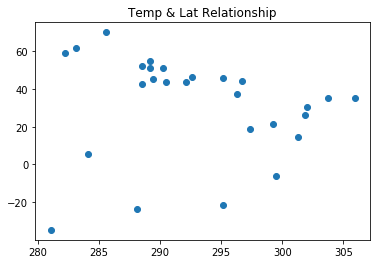

In [36]:
plt.scatter(temperature,latitude)
slope, intercept, r_value, p_value, std_err = sts.linregress(temperature,latitude)
plt.title("Temp & Lat Relationship")
plt.savefig("temp_lat_relationship.png")
#The plot below represents the relationship between temperature and latitude.

In [21]:
#Linear Regression Analyis on  Temp & Lat
#Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(latitude,temperature)
#Linear Regression Valuues
for temp in response_list:
    regress_values = int(temp['coord']["lat"]) * slope + intercept
    print(regress_values)
    #Separate North and South Hemisphere Temps
    if (temp["coord"]["lat"])>=0:
        temp_north_hem.append(temp["main"]["temp"])
    else:
        temp_south_hem.append(temp["main"]["temp"])
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
line_eq

292.0937162369916
292.14972653902794
292.82185016346364
292.2897522941187
293.21392227771776
292.5417986532821
292.56980380430025
292.5978089553184
292.5137935022639
292.6258141063366
292.5978089553184
293.073896522627
293.6620046940082
291.8416698778283
292.96187591855437
292.7658398614273
292.3737677471732
293.4099583348449
292.5417986532821
294.7542055837162
294.39013862048023
292.345762596155
292.3737677471732
293.9700613552079
294.4461489225165
292.82185016346364
293.2979377307722


KeyError: 'coord'

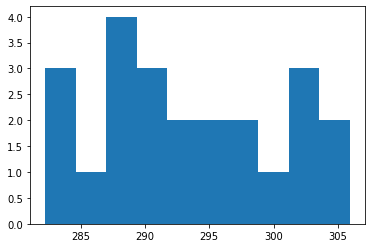

In [37]:
plt.hist(temp_north_hem)
plt.savefig("temp_north_hem.png")

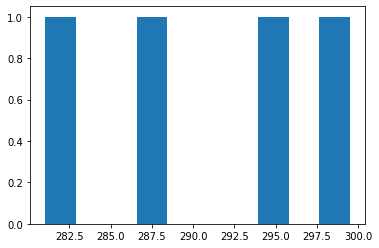

In [38]:
plt.hist(temp_south_hem)
plt.savefig("temp_south_hem.png")
#There is an uneven distribution between the random points returned as points of refrence. The majority of reponses
#returned would be considered the northern hemisphere. 

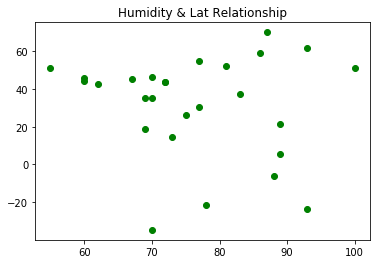

In [39]:
plt.scatter(humidity,latitude, color="green")
sts.linregress(humidity,latitude)
plt.title("Humidity & Lat Relationship")
plt.savefig("humidity_lat.png")
#The plot below represents the relationship between humidity and latitude.

In [25]:
#Linear Regression Analyis on  Temp & Lat
#Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(latitude,humidity)
#Linear Regression Valuues
for temp in response_list:
    #print(temp["main"]["humidity"])
    regress_values = int(temp['coord']["lat"]) * slope + intercept
    print(regress_values)
    #Separate North and South Hemisphere humidity
    if (temp["coord"]["lat"])>=0:
        hum_north_hem.append(temp["main"]["humidity"])
    else:
        hum_south_hem.append(temp["main"]["humidity"])
#Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
line_eq

75.05436462714836
75.15114625917516
76.3125258434969
75.3931003392422
76.98999726768457
75.82861768336285
75.87700849937625
75.92539931538965
75.78022686734944
75.97379013140306
75.92539931538965
76.74804318761755
77.76425032389906
74.6188472830277
76.55447992356393
76.2157442114701
75.53827278728241
77.32873297977842
75.82861768336285
79.65149214842188
79.02241154024762
75.48988197126901
75.53827278728241
78.29654930004652
79.11919317227442
76.3125258434969
77.1351697157248


KeyError: 'coord'

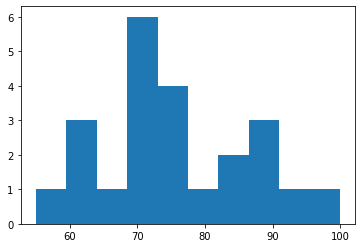

In [40]:
plt.hist(hum_north_hem)
plt.savefig("hum_north_hem.png")

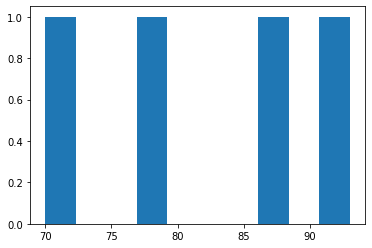

In [41]:
plt.hist(hum_south_hem)
plt.savefig("hum_south_hem.png")

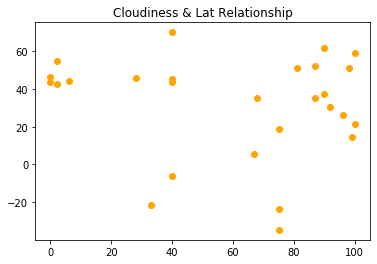

In [42]:
plt.scatter(cloudiness,latitude, color="orange")
sts.linregress(cloudiness,latitude)
plt.title("Cloudiness & Lat Relationship")
plt.savefig("cloud_lat.png")
#The plot below represents the relationship between cloudiness and latitude.

In [43]:
#Linear Regression Analyis on  Temp & Lat
#Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(latitude,humidity)
#Linear Regression Valuues
for temp in response_list:
    #print(temp["clouds"]["all"])
    regress_values = int(temp['coord']["lat"]) * slope + intercept
    print(regress_values)
    #Separate North and South Hemisphere cloudiness
    if (temp["coord"]["lat"])>=0:
        cloud_north_hem.append(temp["clouds"]["all"])
    else:
        cloud_south_hem.append(temp["clouds"]["all"])
#Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
line_eq

75.05436462714836
75.15114625917516
76.3125258434969
75.3931003392422
76.98999726768457
75.82861768336285
75.87700849937625
75.92539931538965
75.78022686734944
75.97379013140306
75.92539931538965
76.74804318761755
77.76425032389906
74.6188472830277
76.55447992356393
76.2157442114701
75.53827278728241
77.32873297977842
75.82861768336285
79.65149214842188
79.02241154024762
75.48988197126901
75.53827278728241
78.29654930004652
79.11919317227442
76.3125258434969
77.1351697157248


KeyError: 'coord'

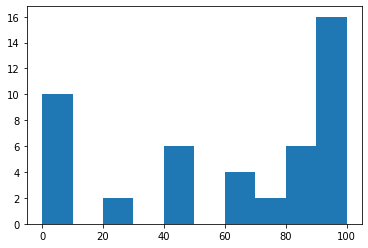

In [44]:
plt.hist(cloud_north_hem)
plt.savefig("cloud_north_hem.png")

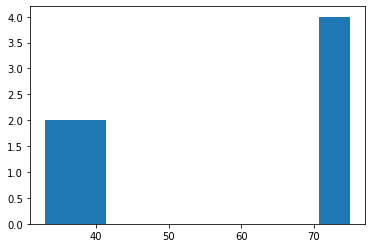

In [45]:
plt.hist(cloud_south_hem)
plt.savefig("cloud_south_hem.png")

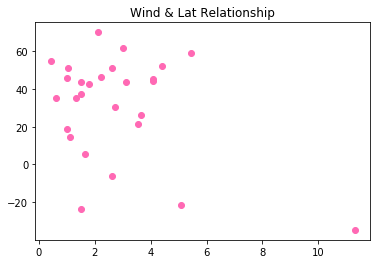

In [46]:
plt.scatter(windspeed,latitude, color="hotpink")
sts.linregress(windspeed,latitude)
plt.title("Wind & Lat Relationship")
plt.savefig("wind_lat.png")
#The plot below represents the relationship beteween windspeed and latitude.

In [47]:
#Linear Regression Analyis on  Temp & Lat
#Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(latitude,humidity)
#Linear Regression Valuues
for temp in response_list:
    #print(temp["wind"]["speed"])
    regress_values = int(temp['coord']["lat"]) * slope + intercept
    print(regress_values)
    #Separate North and South Hemisphere Wind Speed
    if (temp["coord"]["lat"])>=0:
        wind_north_hem.append(temp["clouds"]["all"])
    else:
        wind_south_hem.append(temp["clouds"]["all"])
#Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
line_eq

75.05436462714836
75.15114625917516
76.3125258434969
75.3931003392422
76.98999726768457
75.82861768336285
75.87700849937625
75.92539931538965
75.78022686734944
75.97379013140306
75.92539931538965
76.74804318761755
77.76425032389906
74.6188472830277
76.55447992356393
76.2157442114701
75.53827278728241
77.32873297977842
75.82861768336285
79.65149214842188
79.02241154024762
75.48988197126901
75.53827278728241
78.29654930004652
79.11919317227442
76.3125258434969
77.1351697157248


KeyError: 'coord'

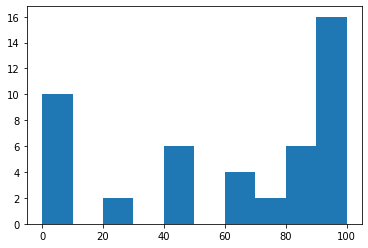

In [48]:
plt.hist(wind_north_hem)
plt.savefig("wind_north_hem.png")

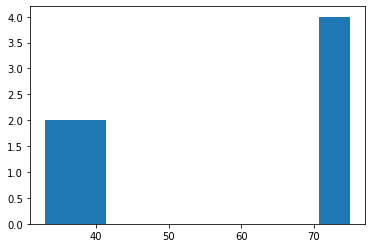

In [49]:
plt.hist(wind_south_hem)
plt.savefig("wind_south_hem.png")